# Detailed Overview

`pymagnet` contains methods for calculating the magnetic field due to a 2D or 3D shape. The library also contains built-in methods to calculate the force and torque on a magnet due to all other instantiated magnets.



## How pymagnet works:

1. We instantiate, or create a set of magnets, such as `magnet_1 = pm.magnets.Rectangle()`
2. Generate an array of points to be calculated, which in 2D is `points = pm.grid2D(20, 20)`
3. Loop over each magnet, calcuate the field at each point and sum this to the total field, using `field = pm.get_field_2D(points)`
4. Draw the resulting data as a line, contour, slice, or volume plot. `pm.plots.plot_2D_contour(points, field)`



## A Full Example in 2D

First, here is a full example of how we can calculate and plot the magnetic field due to a 2D object, a rectangle. We will repeat this step by step below.

First, we will import the module, and any other useful ones, such as numpy and matplotlib.


In [37]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    %!pip install pymagnet -q
else:
    print('Not running on CoLab.')

Not running on CoLab.


In [38]:
import pymagnet as pm

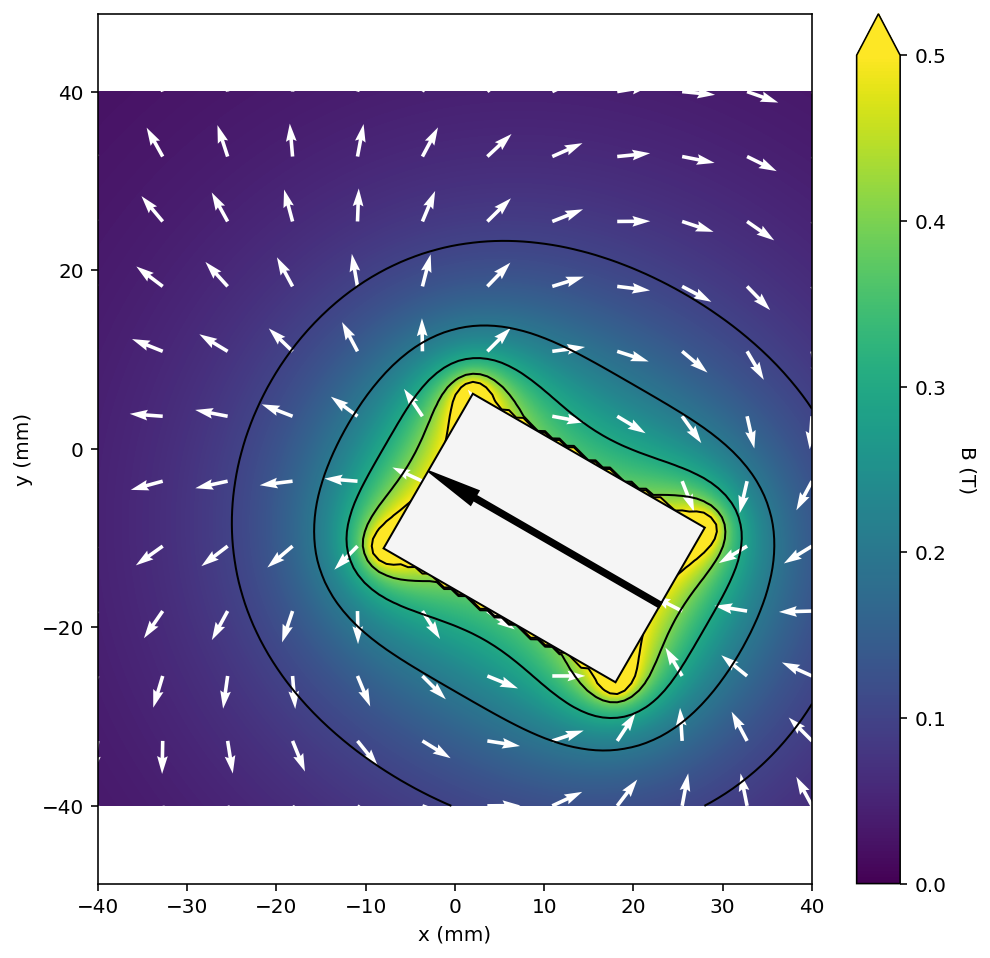

In [39]:
pm.reset();
cmap = 'viridis'

unit = 'mm' # we define the length scale
width = 30
height = 20

center = (10, -10)
magnet_1 = pm.magnets.Rectangle(width = width, height = height, center=center, 
                                Jr = -1.2, phi = 0.0, # Magnetisation value and direction
                                alpha = 30, # Magnet Orientation
                               )

# Get a grid of points
points = pm.grid2D(40, 40, unit=unit)

# Calculate the magnetic field
field = pm.get_field_2D(points)

# Plot the result
fig, ax = pm.plots.plot_2D_contour(points, field,
                         cmax=0.5, # max value for colormap
                         num_levels=6, # number of contour lines to plot
                         cmap=cmap, # what colormap to use, defaults to 'viridis'
                         num_arrows=11, # Set the number of arrows to a value to show the vectors as a quiver plot
                        )

### Creating Magnets

A registry keeps track of every magnet created, we can see the magnet from the previous example by running the following command:

In [40]:
pm.list()

Rectangle
J: [-1.2 -0. ] (T)
Size: [30 20]
Center [ 10 -10]
Orientation: alpha 30



So before starting a new calculation, it is best practice to clear the registry:

In [41]:
pm.reset()

Once this is done, you can check that the registry is empty, it should print:

`No Instances`

In [42]:
pm.list()

No Instances


All magnet types can be found under `pm.magnets.`, such as `pm.magnets.Rectangle()` for a 2D magnet of type `Magnet2D`.

In [43]:
magnet_1 = pm.magnets.Rectangle()

If we want to look at it's properties:

In [44]:
magnet_1

Rectangle
J: [0. 1.] (T)
Size: [20. 40.]
Center [0. 0.]
Orientation: alpha 0.0

A Rectangle has 4 properties, its remnant magnetisation $\mathbf{J} = J_x \mathbf{\hat{x}}  + J_y \mathbf{\hat{y}}$

`J: [0. 1.] (T)`

which can be changed by through `Jr`, the signed magnitude, and `phi` the angle of the magnetisation with respect to the x-axis.


By default it is magnetised in $y$.


Let's change the magnetic properties using `Jr`  and `phi`:

In [45]:
pm.reset()
magnet_1 = pm.magnets.Rectangle(Jr=-1.2)

magnet_1

Rectangle
J: [-0.  -1.2] (T)
Size: [20. 40.]
Center [0. 0.]
Orientation: alpha 0.0

Note that it is still magnetised in $y$. Next we will add `phi = 0`:

In [46]:
pm.reset()
magnet_1 = pm.magnets.Rectangle(Jr=-1.2, phi = 0)

magnet_1

Rectangle
J: [-1.2 -0. ] (T)
Size: [20. 40.]
Center [0. 0.]
Orientation: alpha 0.0

Now the magnet is magnetised solely in the $x$ direction. You can see this if you vary the parameters in the full example at the top.


Next, the default size is 20 $\times$ 40: 

`Size: [20. 40.]`

Note that the units are not yet defined. We will define this in the next step. It's center is (0,0):

`Center [0. 0.]`

and the orientation of the magnet with respect to the y-axis is 0

`Orientation: alpha 0.0`


We can modify all these parameters at the same time:

In [47]:
pm.reset()
magnet_1 = pm.magnets.Rectangle(width = 30, height = 20, center=(10, -10), Jr=-1.2, phi = 0, alpha = 30)

magnet_1

Rectangle
J: [-1.2 -0. ] (T)
Size: [30 20]
Center [ 10 -10]
Orientation: alpha 30

All the properties of a magnet can be accessed with the dot notation, such as `magnet_1.width`

There are getters too like `magnet_1.get_center()` to safely return the center without direct access to the magnet center value.

 

In [48]:
magnet_1.get_center()

array([ 10, -10])

### Creating a grid of points

Next we need to generate a grid of points. To do this we use `pm.grid2D(xmax, ymax)`, which will generate a grid of (100, 100) x values, (100, 100) y values, and a default unit of 'mm'.

In [49]:
points = pm.grid2D(40, 40)

It creates a structure that we can access, such as `points.x` or `points.unit`:

In [50]:
points.x

array([[-40.        , -40.        , -40.        , ..., -40.        ,
        -40.        , -40.        ],
       [-39.19191919, -39.19191919, -39.19191919, ..., -39.19191919,
        -39.19191919, -39.19191919],
       [-38.38383838, -38.38383838, -38.38383838, ..., -38.38383838,
        -38.38383838, -38.38383838],
       ...,
       [ 38.38383838,  38.38383838,  38.38383838, ...,  38.38383838,
         38.38383838,  38.38383838],
       [ 39.19191919,  39.19191919,  39.19191919, ...,  39.19191919,
         39.19191919,  39.19191919],
       [ 40.        ,  40.        ,  40.        , ...,  40.        ,
         40.        ,  40.        ]])

In [51]:
points.unit

'mm'

If we want to change the units, this needs to be done using a different function:

In [52]:
points.change_unit('cm')

By doing this, not only do we recale the points in the points structure:

In [53]:
points

[Unit: cm
x: [[-4.         -4.         -4.         ... -4.         -4.
  -4.        ]
 [-3.91919192 -3.91919192 -3.91919192 ... -3.91919192 -3.91919192
  -3.91919192]
 [-3.83838384 -3.83838384 -3.83838384 ... -3.83838384 -3.83838384
  -3.83838384]
 ...
 [ 3.83838384  3.83838384  3.83838384 ...  3.83838384  3.83838384
   3.83838384]
 [ 3.91919192  3.91919192  3.91919192 ...  3.91919192  3.91919192
   3.91919192]
 [ 4.          4.          4.         ...  4.          4.
   4.        ]]
y: [[-4.         -3.91919192 -3.83838384 ...  3.83838384  3.91919192
   4.        ]
 [-4.         -3.91919192 -3.83838384 ...  3.83838384  3.91919192
   4.        ]
 [-4.         -3.91919192 -3.83838384 ...  3.83838384  3.91919192
   4.        ]
 ...
 [-4.         -3.91919192 -3.83838384 ...  3.83838384  3.91919192
   4.        ]
 [-4.         -3.91919192 -3.83838384 ...  3.83838384  3.91919192
   4.        ]
 [-4.         -3.91919192 -3.83838384 ...  3.83838384  3.91919192
   4.        ]]]

but also the size of the magnets already created:

In [54]:
magnet_1

Rectangle
J: [-1.2 -0. ] (T)
Size: [3. 2.]
Center [ 1. -1.]
Orientation: alpha 30

Let's change it back to mm:

In [55]:
points.change_unit('mm')

and list all the magnets in our registry:

In [56]:
pm.list()

Rectangle
J: [-1.2 -0. ] (T)
Size: [30. 20.]
Center [ 10. -10.]
Orientation: alpha 30



In [57]:
points

[Unit: mm
x: [[-40.         -40.         -40.         ... -40.         -40.
  -40.        ]
 [-39.19191919 -39.19191919 -39.19191919 ... -39.19191919 -39.19191919
  -39.19191919]
 [-38.38383838 -38.38383838 -38.38383838 ... -38.38383838 -38.38383838
  -38.38383838]
 ...
 [ 38.38383838  38.38383838  38.38383838 ...  38.38383838  38.38383838
   38.38383838]
 [ 39.19191919  39.19191919  39.19191919 ...  39.19191919  39.19191919
   39.19191919]
 [ 40.          40.          40.         ...  40.          40.
   40.        ]]
y: [[-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 ...
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.

### Calculating the magnetic field

For this, we simply pass our points of interest to the `pm.get_field_2D` command:

In [58]:
field = pm.get_field_2D(points)

This routine handles all the magnets for us and returns a field structure consisting of the x and y components of the magnetic field, along with the absolute magnetitude, and the units used, T by default. The components can be access using:
`field.x`, `field.y`, `field.n`, `field.unit`:

In [59]:
field

[Unit: T
Bx: [[ 0.00219956  0.00146102  0.00068744 ... -0.01255016 -0.01200009
  -0.01146725]
 [ 0.00275656  0.00200517  0.00121669 ... -0.01240805 -0.01184771
  -0.01130555]
 [ 0.00335007  0.00258643  0.00178354 ... -0.01224747 -0.01167717
  -0.01112599]
 ...
 [-0.03011497 -0.03291728 -0.03589989 ...  0.03001428  0.02954909
   0.02908392]
 [-0.03116971 -0.03389883 -0.03679304 ...  0.02917228  0.02874471
   0.02831554]
 [-0.03206436 -0.03471513 -0.03751662 ...  0.02833296  0.02794194
   0.02754777]]
By: [[-0.03300347 -0.03353649 -0.0340554  ...  0.02069542  0.02055694
   0.02040853]
 [-0.03373064 -0.03429945 -0.03485464 ...  0.02125959  0.02110327
   0.0209373 ]
 [-0.03446935 -0.035076   -0.03566965 ...  0.02183436  0.02165923
   0.02147479]
 ...
 [ 0.06455207  0.06565753  0.06668519 ... -0.01786403 -0.01704047
  -0.01625421]
 [ 0.06187029  0.06280592  0.06365828 ... -0.01830958 -0.01748733
  -0.01670138]
 [ 0.05925747  0.06003737  0.06072992 ... -0.01871723 -0.0178979
  -0.01711381]]


In [60]:
field.x

array([[ 0.00219956,  0.00146102,  0.00068744, ..., -0.01255016,
        -0.01200009, -0.01146725],
       [ 0.00275656,  0.00200517,  0.00121669, ..., -0.01240805,
        -0.01184771, -0.01130555],
       [ 0.00335007,  0.00258643,  0.00178354, ..., -0.01224747,
        -0.01167717, -0.01112599],
       ...,
       [-0.03011497, -0.03291728, -0.03589989, ...,  0.03001428,
         0.02954909,  0.02908392],
       [-0.03116971, -0.03389883, -0.03679304, ...,  0.02917228,
         0.02874471,  0.02831554],
       [-0.03206436, -0.03471513, -0.03751662, ...,  0.02833296,
         0.02794194,  0.02754777]])

In [61]:
field.unit

'T'

Just like the points, we can update the units of the field vector:

In [62]:
field.change_unit('mT')

field

[Unit: mT
Bx: [[  2.19956131   1.46101621   0.68744404 ... -12.55016264 -12.00008752
  -11.46725285]
 [  2.75656494   2.00517047   1.21668942 ... -12.40804589 -11.84771432
  -11.30555002]
 [  3.35007383   2.58642715   1.78353932 ... -12.24746878 -11.67716942
  -11.12599068]
 ...
 [-30.11496995 -32.91728287 -35.89988875 ...  30.01428181  29.54908601
   29.08391707]
 [-31.1697109  -33.8988262  -36.79304261 ...  29.17228102  28.74471413
   28.31553654]
 [-32.06435646 -34.7151349  -37.51662376 ...  28.33295894  27.94193511
   27.54777015]]
By: [[-33.00347482 -33.53649074 -34.05539905 ...  20.695424    20.55693891
   20.40853136]
 [-33.73063751 -34.29944763 -34.85464378 ...  21.25958967  21.10326728
   20.93729837]
 [-34.46934591 -35.07599915 -35.66964819 ...  21.83435995  21.65923327
   21.47478934]
 ...
 [ 64.55206745  65.65752742  66.6851906  ... -17.86403403 -17.04046948
  -16.25420753]
 [ 61.87028964  62.80592479  63.65827867 ... -18.30958298 -17.48733034
  -16.70137612]
 [ 59.25747006

Let's change it back:

In [63]:
field.change_unit('T')
field.unit

'T'

### Plotting

Finally we can make a contour plot of our data:

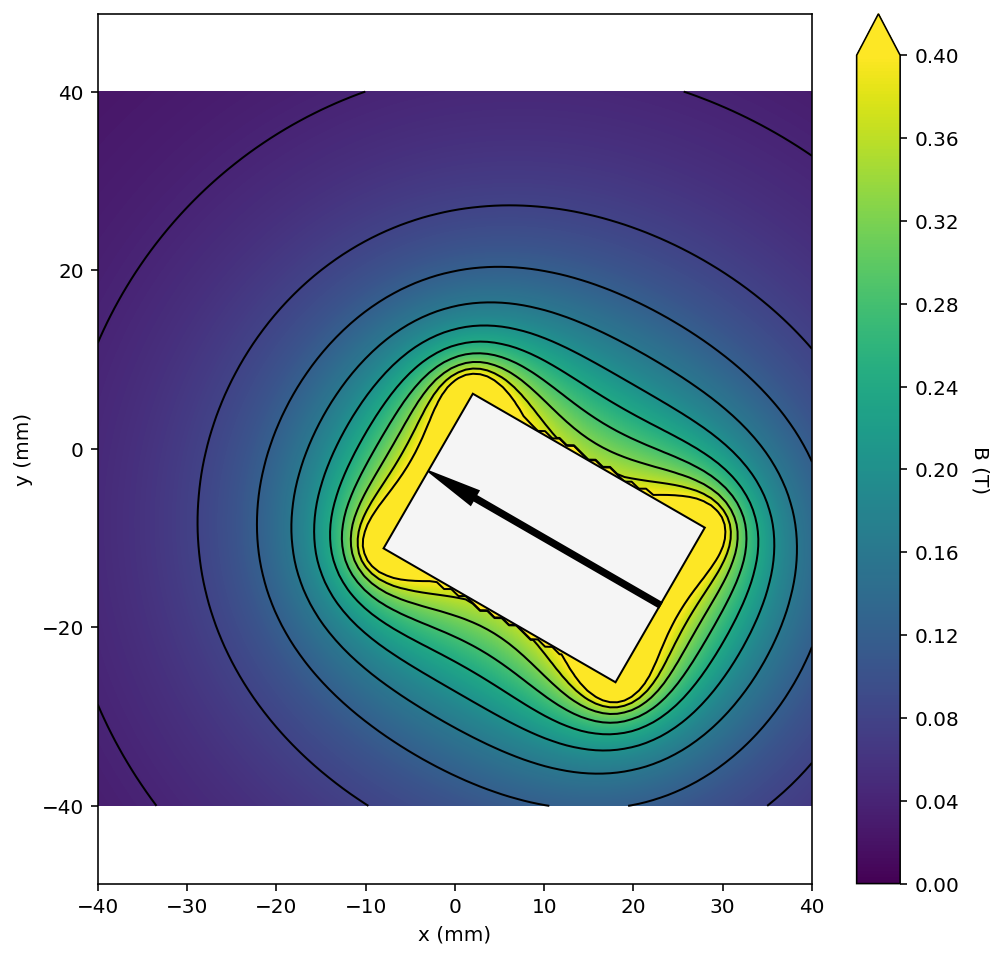

In [64]:
fig, ax = pm.plots.plot_2D_contour(points, field)

Plotting the magnetic field inside a magnet, and changing the colorscale:

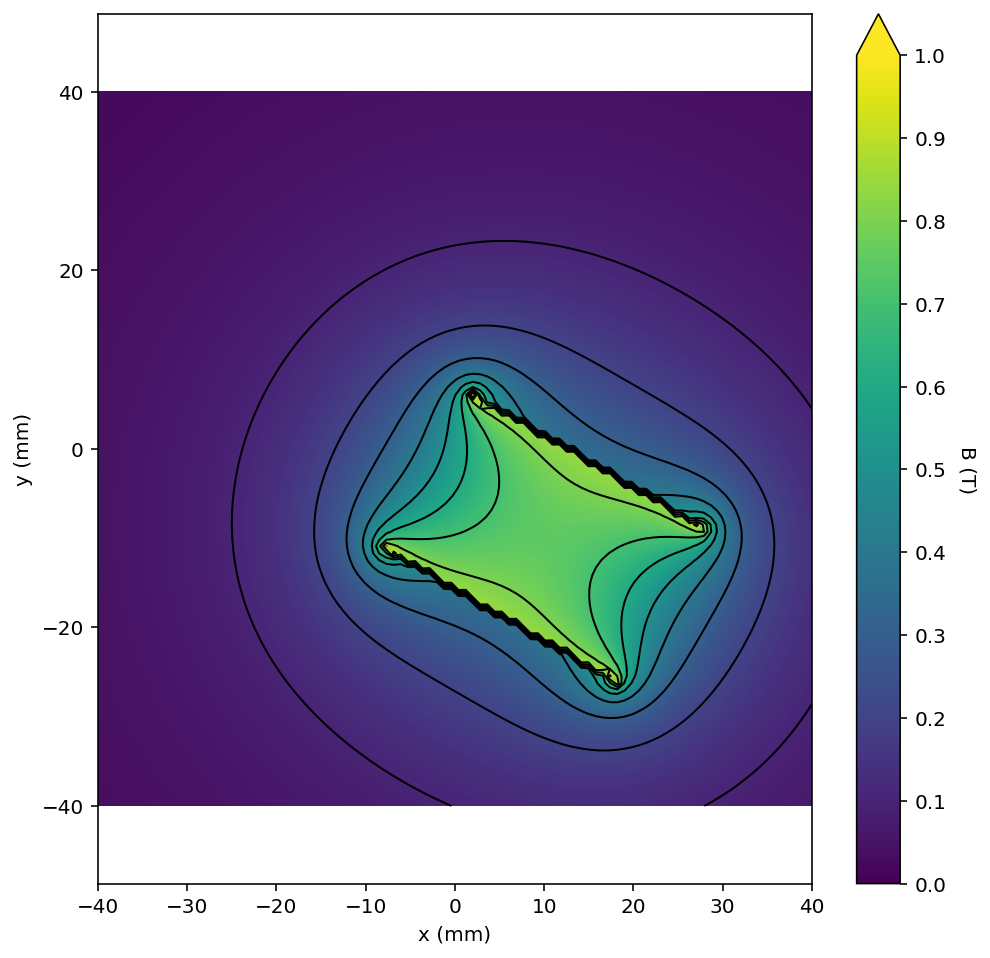

In [65]:
fig, ax = pm.plots.plot_2D_contour(points, field, show_magnets=False, cmin = 0.0, cmax=1.0)

And now the colormap:

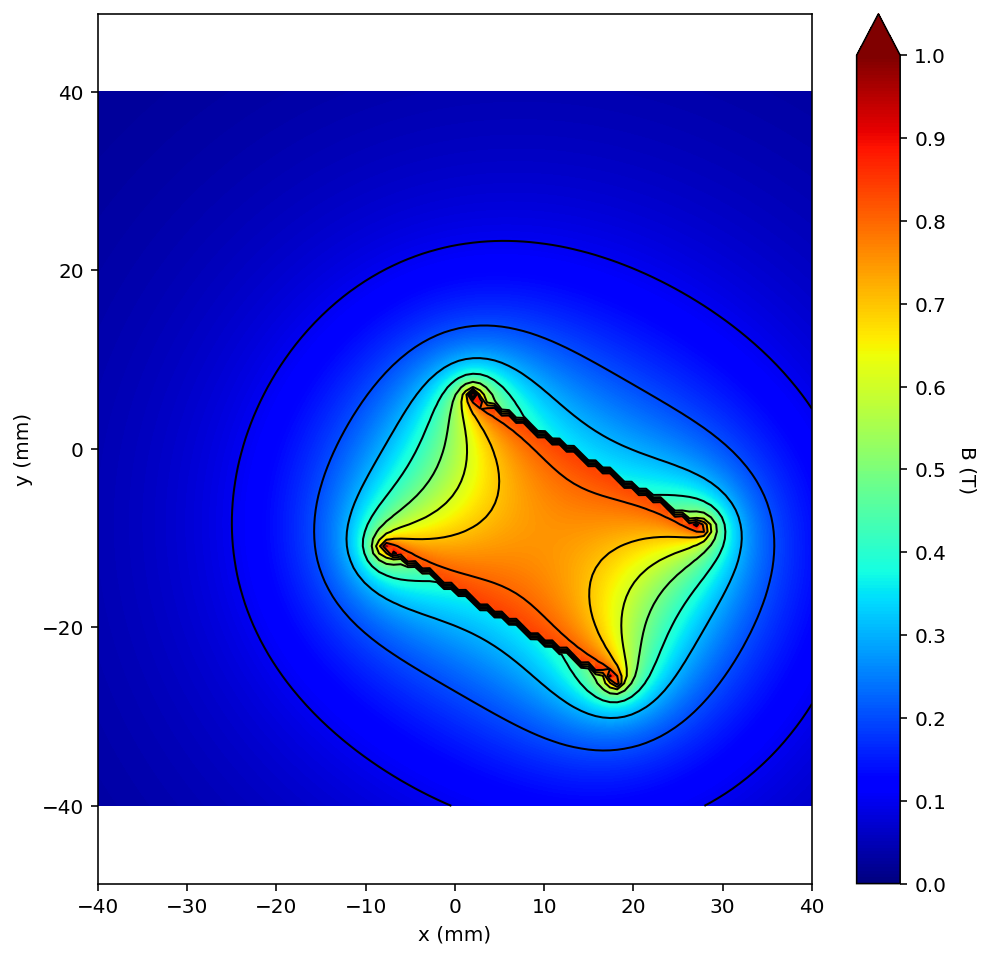

In [66]:
fig, ax = pm.plots.plot_2D_contour(points, field, show_magnets=False, cmin = 0.0, cmax=1.0, cmap='jet')

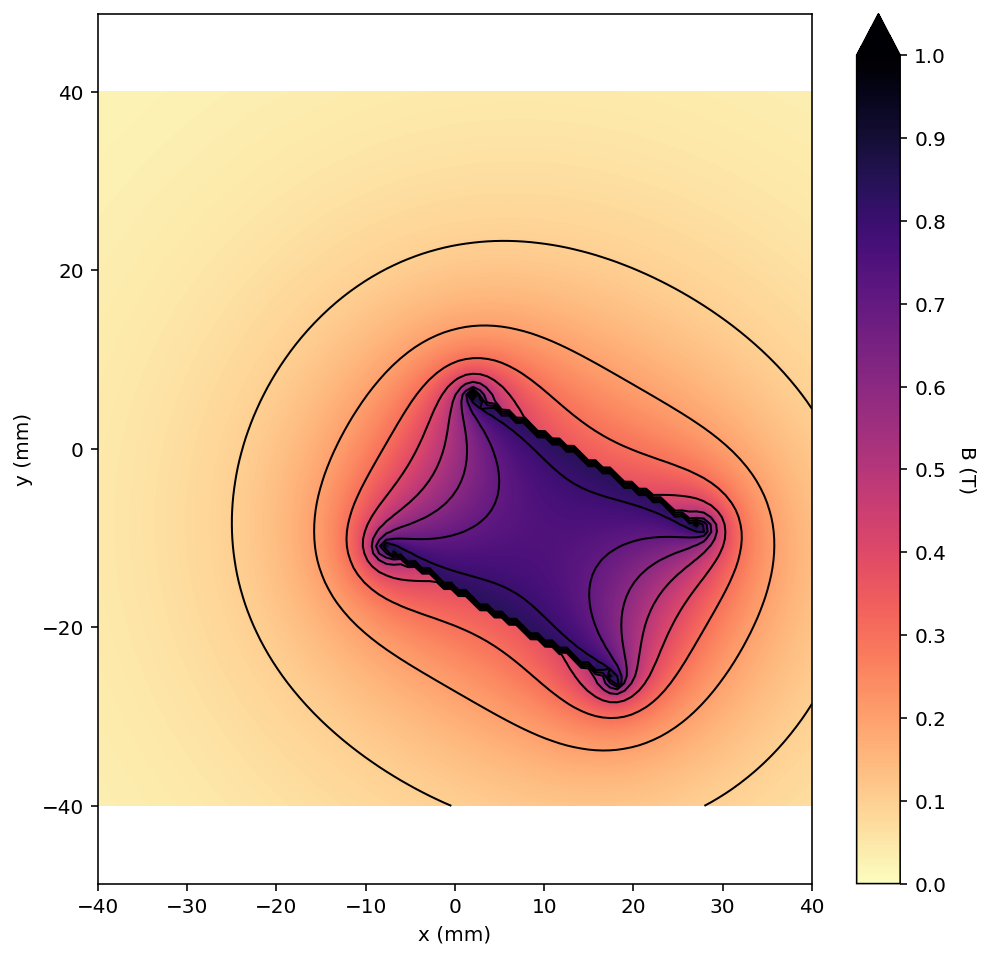

In [67]:
fig, ax = pm.plots.plot_2D_contour(points, field, show_magnets=False, cmin = 0.0, cmax=1.0, cmap='magma_r')

### Other grid2D options

Before changing how the plot looks, here's a good point to show the other parameters in grid2D. By default grid2D creates grids of (100,100), which we can change with `num_points`, the minimum x and y values for the grids are -xmax  and -ymax. We can instead change these:

In [68]:
points = pm.grid2D(40, 40, xmin= 0, ymin=-10, num_points = 200)

points.x.shape

(200, 200)

Now lets recalculate and plot:

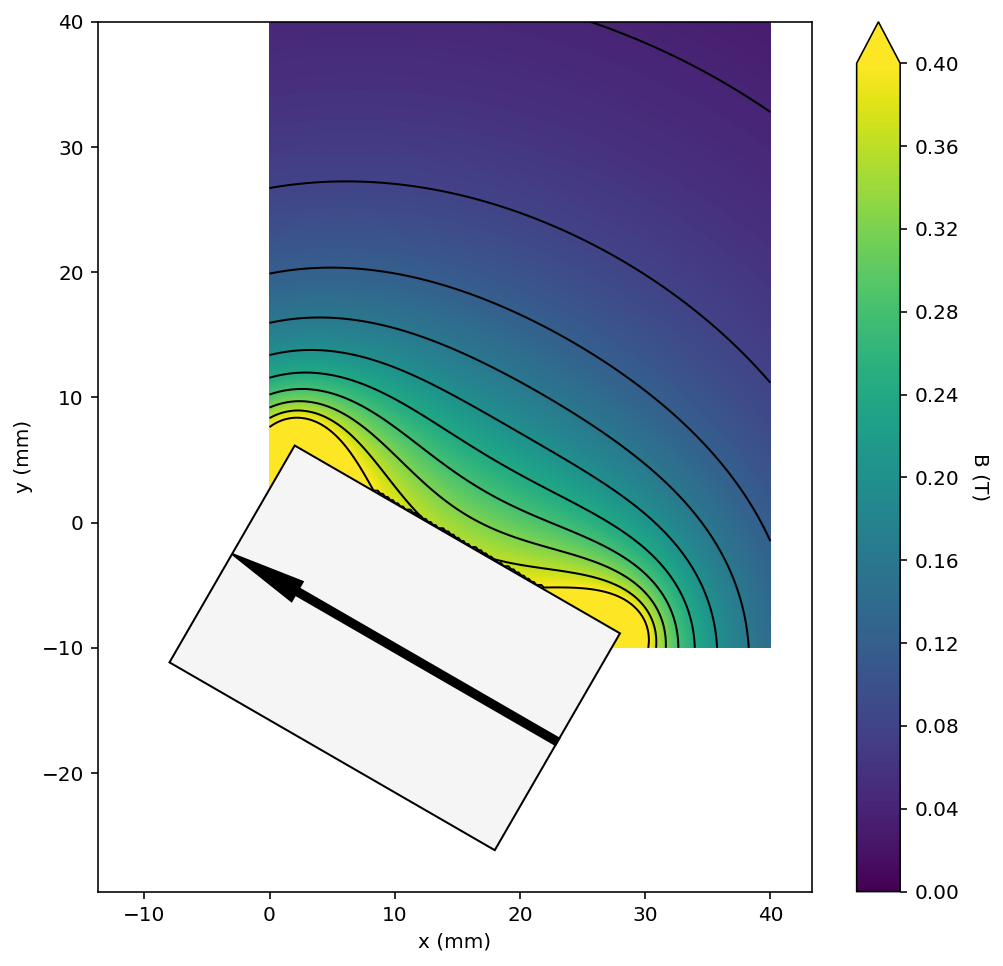

In [69]:
field = pm.get_field_2D(points)
fig, ax = pm.plots.plot_2D_contour(points, field)

### Contour plot options

Next we will demonstrate many of the other options available in the plotting tools, first by adding a quiver plot with the keyword argument `num_arrows=11`:

This sets the number of arrows to be plotted along each axis.

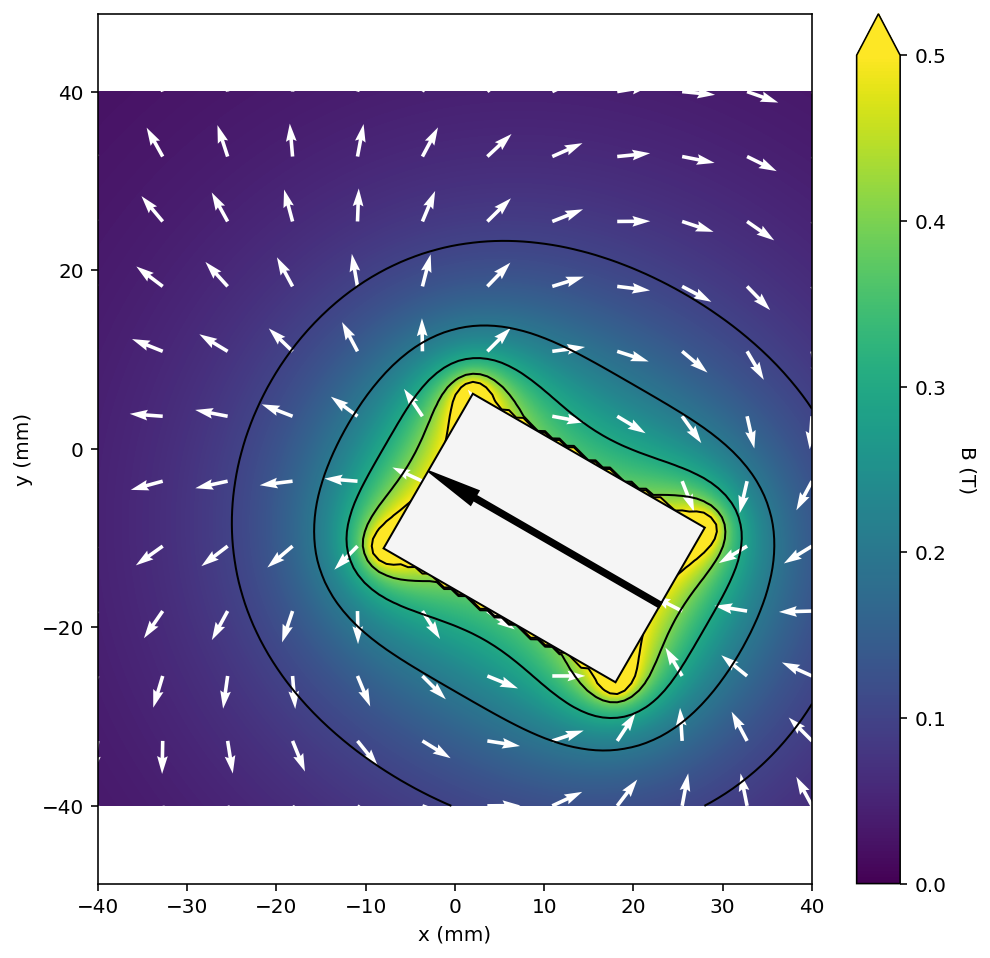

In [70]:
points = pm.grid2D(40, 40)
field = pm.get_field_2D(points)
fig, ax = pm.plots.plot_2D_contour(points, field,
                         cmax=0.5, # max value for colormap
                         num_levels=6, # number of contour lines to plot
                         num_arrows = 11# Set the number of arrows to a value to show the vectors as a quiver plot
                        )

#### Stream Plots:



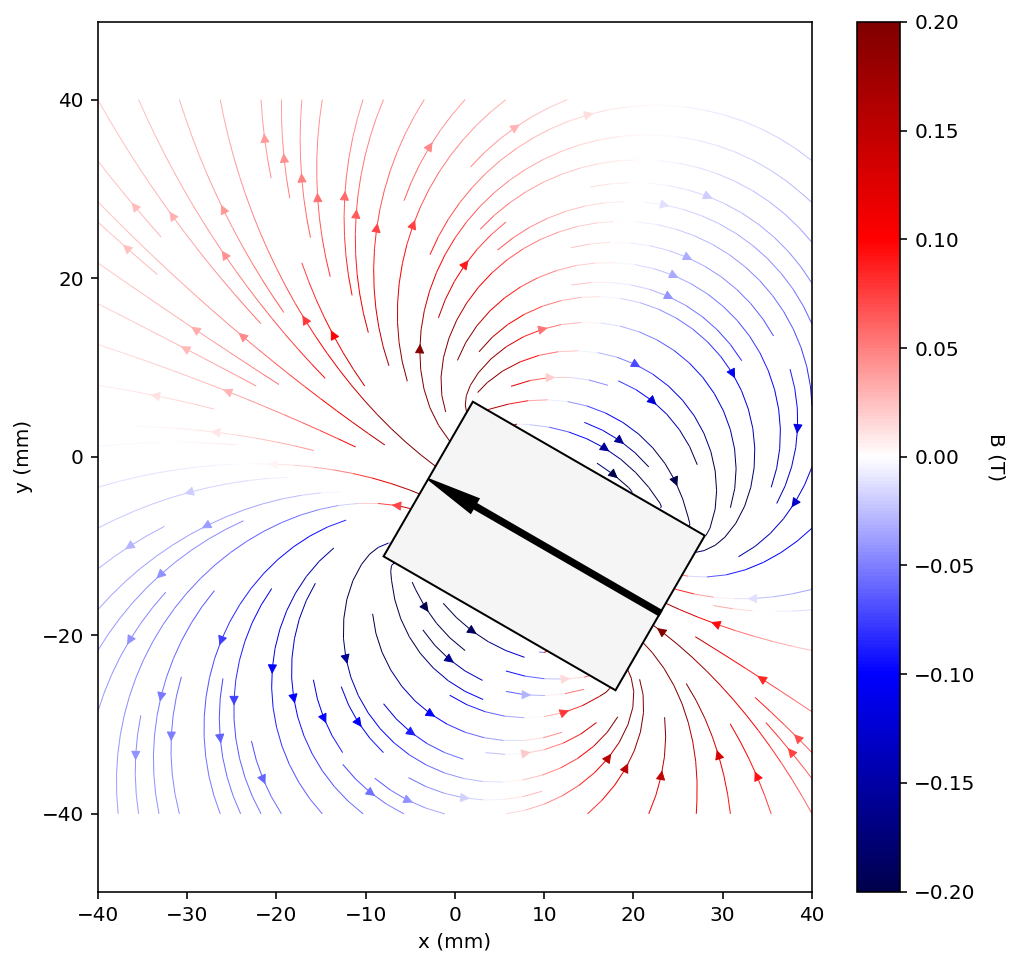

In [71]:
fig, ax = pm.plots.plot_2D_contour(points, field,
                         cmin = -0.2,
                         cmax=0.2, # max value for colormap
                         num_levels=6, # number of contour lines to plot
                         cmap='seismic', # what colormap to use, defaults to 'viridis'
                         plot_type='streamplot', # This should be either streamplot or contourplot
                        )

Black and white stream plot:

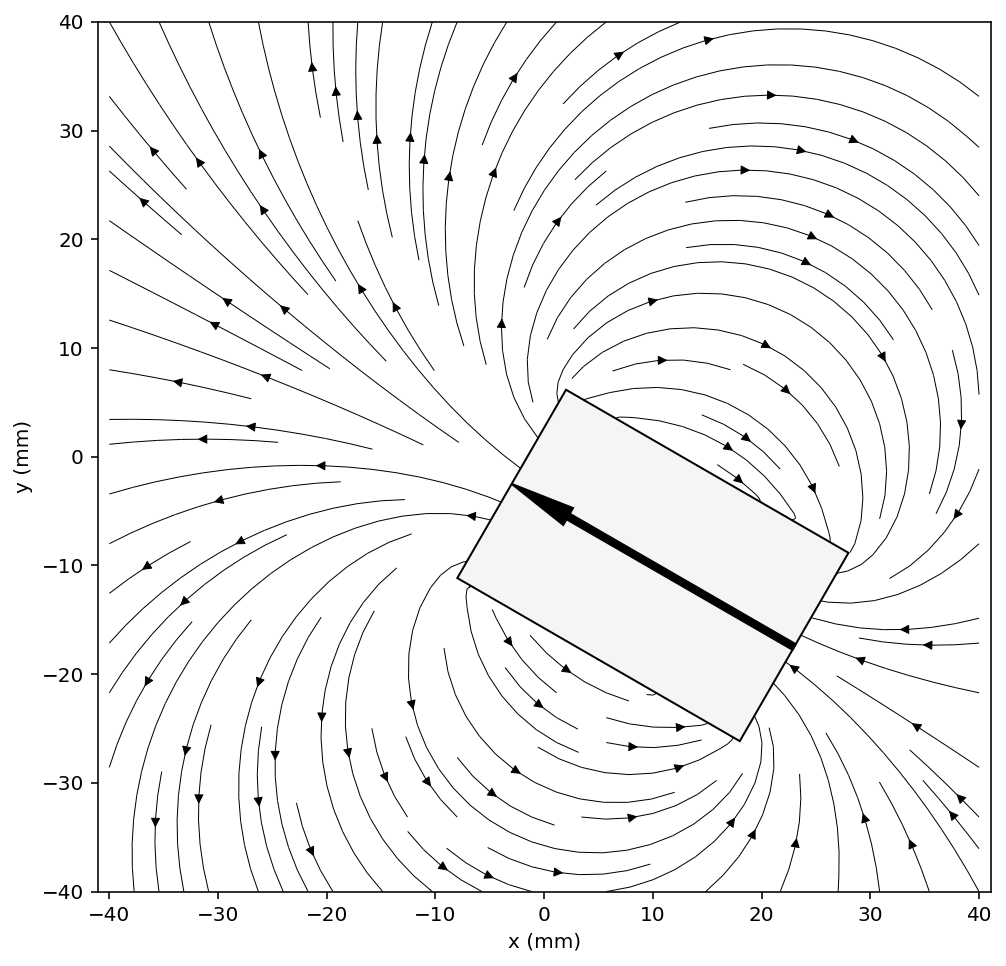

In [72]:
fig, ax = pm.plots.plot_2D_contour(points, field, plot_type='streamplot')